In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("/kaggle/input/quora-duplicate-questions-copy/train.csv")

In [3]:
df.shape

(404290, 6)

In [4]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [5]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.duplicated().sum()

0

In [8]:
df=df.head(200000)

In [14]:
def preprocess(q):
    q=str(q).lower().strip()
    
    q=q.replace('%',' percent ')
    q=q.replace('@',' at ')
    q=q.replace('$',' dollar ')
    
    q=q.replace('[math]','')
    
    q=q.replace(',000,000,000 ','b ')
    q=q.replace(',000,000 ','m ')
    q=q.replace(',000 ','k ')
    
    import re
    q=re.sub(r'([0-9]+)000000000',r'\1b',q)
    q=re.sub(r'([0-9]+)000000',r'\1m',q)
    q=re.sub(r'([0-9]+)000',r'\1k',q)
    
    contractions = { 
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")
    
    q=re.sub(re.compile('<.*?>'),'',q)
    
    import string
    q=q.translate(str.maketrans('', '', string.punctuation))
    
    return q

<Axes: xlabel='is_duplicate'>

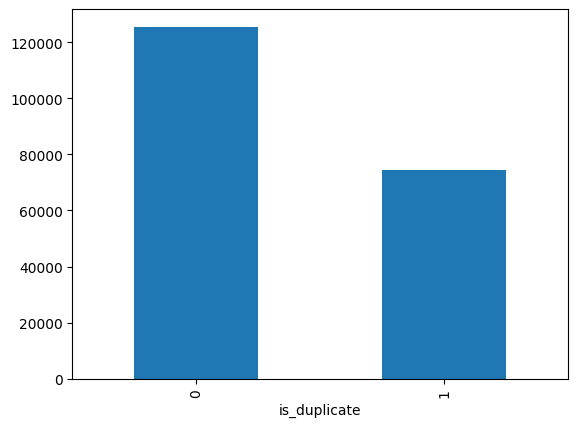

In [10]:
df['is_duplicate'].value_counts().plot(kind='bar')

In [11]:
qid=pd.Series(df['qid1'].tolist()+df['qid2'].tolist())

In [12]:
np.unique(qid).shape[0]

301629

In [15]:
df['question1']=df['question1'].apply(preprocess)
df['question2']=df['question2'].apply(preprocess)

In [16]:
qid.shape[0]

400000

In [17]:
x=qid.value_counts()>1

In [18]:
x[x]

2559      True
4044      True
30782     True
17978     True
2561      True
          ... 
41258     True
64963     True
22576     True
141425    True
47459     True
Name: count, Length: 47906, dtype: bool

In [19]:
x[x].shape[0]

47906

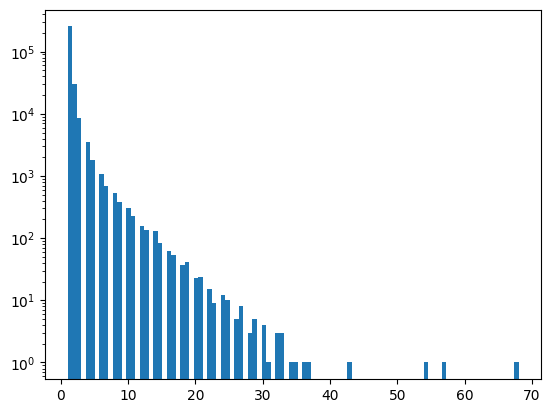

In [20]:
plt.hist(qid.value_counts().values,bins=100)
plt.yscale('log')
plt.show()

In [21]:
df.drop(columns=['id','qid1','qid2'],inplace=True)

In [22]:
df

,question1,question2,is_duplicate
0,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0
1,what is the story of kohinoor kohinoor diamond,what would happen if the indian government sto...,0
2,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0
3,why am i mentally very lonely how can i solve it,find the remainder when 2324math is divided by...,0
4,which one dissolve in water quikly sugar salt ...,which fish would survive in salt water,0
...,...,...,...
199996,which of these tv shows should i watch next,what are some thriller shows i should watch next,0
199997,should i change my name,should i legally change my first name,0
199998,should i buy the new macbook 2016 or one from ...,should i buy the new macbook pro 2016 or the m...,1
199999,what is your review of love 2011 movie,what is your review of love birds 2011 movie,0


In [23]:
df['q1_len']=df['question1'].str.len()
df['q2_len']=df['question2'].str.len()

In [24]:
df['q1_num_words']=df['question1'].apply(lambda row: len(row.split(" ")))
df['q2_num_words']=df['question2'].apply(lambda row: len(row.split(" ")))

In [25]:
def common_words(row):
    w1=set(map(lambda word: word.lower().strip(),row['question1'].split(" ")))
    w2=set(map(lambda word: word.lower().strip(),row['question2'].split(" ")))
    return len(w1 & w2)

In [26]:
def total_words(row):
    w1=set(map(lambda word: word.lower().strip(),row['question1'].split(" ")))
    w2=set(map(lambda word: word.lower().strip(),row['question2'].split(" ")))
    return len(w1) + len(w2)

In [27]:
df['word_common']=df.apply(common_words,axis=1)

In [28]:
df['word_total']=df.apply(total_words,axis=1)

In [29]:
df

,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total
0,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,65,56,14,12,11,23
1,what is the story of kohinoor kohinoor diamond,what would happen if the indian government sto...,0,46,83,8,13,4,18
2,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,72,58,14,10,4,24
3,why am i mentally very lonely how can i solve it,find the remainder when 2324math is divided by...,0,48,51,11,9,0,19
4,which one dissolve in water quikly sugar salt ...,which fish would survive in salt water,0,73,38,13,7,4,20
...,...,...,...,...,...,...,...,...,...
199996,which of these tv shows should i watch next,what are some thriller shows i should watch next,0,43,48,9,9,5,18
199997,should i change my name,should i legally change my first name,0,23,37,5,7,5,12
199998,should i buy the new macbook 2016 or one from ...,should i buy the new macbook pro 2016 or the m...,1,50,61,11,13,9,21
199999,what is your review of love 2011 movie,what is your review of love birds 2011 movie,0,38,44,8,9,8,17


In [30]:
df['word_share']=round(df['word_common']/df['word_total'],2)

In [31]:
df

,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
0,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,65,56,14,12,11,23,0.48
1,what is the story of kohinoor kohinoor diamond,what would happen if the indian government sto...,0,46,83,8,13,4,18,0.22
2,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,72,58,14,10,4,24,0.17
3,why am i mentally very lonely how can i solve it,find the remainder when 2324math is divided by...,0,48,51,11,9,0,19,0.00
4,which one dissolve in water quikly sugar salt ...,which fish would survive in salt water,0,73,38,13,7,4,20,0.20
...,...,...,...,...,...,...,...,...,...,...
199996,which of these tv shows should i watch next,what are some thriller shows i should watch next,0,43,48,9,9,5,18,0.28
199997,should i change my name,should i legally change my first name,0,23,37,5,7,5,12,0.42
199998,should i buy the new macbook 2016 or one from ...,should i buy the new macbook pro 2016 or the m...,1,50,61,11,13,9,21,0.43
199999,what is your review of love 2011 movie,what is your review of love birds 2011 movie,0,38,44,8,9,8,17,0.47


In [32]:
ndf1=df[['question1','question2']]
ndf2=df.drop(columns=['question1','question2'])

In [33]:
ndf1

,question1,question2
0,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...
1,what is the story of kohinoor kohinoor diamond,what would happen if the indian government sto...
2,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...
3,why am i mentally very lonely how can i solve it,find the remainder when 2324math is divided by...
4,which one dissolve in water quikly sugar salt ...,which fish would survive in salt water
...,...,...
199996,which of these tv shows should i watch next,what are some thriller shows i should watch next
199997,should i change my name,should i legally change my first name
199998,should i buy the new macbook 2016 or one from ...,should i buy the new macbook pro 2016 or the m...
199999,what is your review of love 2011 movie,what is your review of love birds 2011 movie


In [34]:
ndf2

,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
0,0,65,56,14,12,11,23,0.48
1,0,46,83,8,13,4,18,0.22
2,0,72,58,14,10,4,24,0.17
3,0,48,51,11,9,0,19,0.00
4,0,73,38,13,7,4,20,0.20
...,...,...,...,...,...,...,...,...
199996,0,43,48,9,9,5,18,0.28
199997,0,23,37,5,7,5,12,0.42
199998,1,50,61,11,13,9,21,0.43
199999,0,38,44,8,9,8,17,0.47


In [35]:
from nltk.corpus import stopwords

def fetch_token_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    SAFE_DIV = 0.0001 

    STOP_WORDS = stopwords.words("english")
    
    token_features = [0.0]*8
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features

In [37]:
token_features = df.apply(fetch_token_features, axis=1)

df["cwc_min"]       = list(map(lambda x: x[0], token_features))
df["cwc_max"]       = list(map(lambda x: x[1], token_features))
df["csc_min"]       = list(map(lambda x: x[2], token_features))
df["csc_max"]       = list(map(lambda x: x[3], token_features))
df["ctc_min"]       = list(map(lambda x: x[4], token_features))
df["ctc_max"]       = list(map(lambda x: x[5], token_features))
df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
df["first_word_eq"] = list(map(lambda x: x[7], token_features))

In [39]:
pip install distance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.3/180.3 kB 4.6 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for distance: filename=Distance-0.1.3-py3-none-any.whl size=16258 sha256=6c453fd32a1b4654b42ddab6a4fe1a41aa05c41cfebc45e51020dc665fc9da41
  Stored in directory: /root/.cache/pip/wheels/e8/bb/de/f71bf63559ea9a921059a5405806f7ff6ed612a9231c4a9309
Successfully built distance
Note: you may need to restart the kernel to use updated packages.


In [43]:
import distance

def fetch_length_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    length_features = [0.0]*3
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features
    
    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))
    
    # Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens)) / 2
    
    # Find the longest common substring
    strs = list(distance.lcsubstrings(q1, q2))
    if strs:
        length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    else:
        length_features[2] = 0.0
    
    return length_features

In [44]:
length_features = df.apply(fetch_length_features, axis=1)

df['abs_len_diff'] = list(map(lambda x: x[0], length_features))
df['mean_len'] = list(map(lambda x: x[1], length_features))
df['longest_substr_ratio'] = list(map(lambda x: x[2], length_features))

In [45]:
# Fuzzy Features
from fuzzywuzzy import fuzz

def fetch_fuzzy_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    fuzzy_features = [0.0]*4
    
    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

/opt/conda/lib/python3.10/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [46]:
fuzzy_features = df.apply(fetch_fuzzy_features, axis=1)

# Creating new feature columns for fuzzy features
df['fuzz_ratio'] = list(map(lambda x: x[0], fuzzy_features))
df['fuzz_partial_ratio'] = list(map(lambda x: x[1], fuzzy_features))
df['token_sort_ratio'] = list(map(lambda x: x[2], fuzzy_features))
df['token_set_ratio'] = list(map(lambda x: x[3], fuzzy_features))

In [47]:
ndf1=df[['question1','question2']]
ndf2=df.drop(columns=['question1','question2'])

In [48]:
from sklearn.feature_extraction.text import CountVectorizer
questions=list(ndf1['question1'])+list(ndf1['question2'])

In [49]:
cv=CountVectorizer(max_features=1000)

In [50]:
q1_arr,q2_arr=np.vsplit(cv.fit_transform(questions).toarray(),2)

In [51]:

temp_df=pd.concat([pd.DataFrame(q1_arr,index=ndf1.index),pd.DataFrame(q2_arr,index=ndf1.index)],axis=1)
temp_df.shape

(200000, 2000)

In [52]:
q1_arr=""
q2_arr=""

In [53]:
temp_df=pd.concat([ndf2,temp_df],axis=1)

In [54]:
temp_df.shape

(200000, 2023)

In [55]:
temp_df['is_duplicate']

0         0
1         0
2         0
3         0
4         0
         ..
199996    0
199997    0
199998    1
199999    0
200000    0
Name: is_duplicate, Length: 200000, dtype: int64

In [56]:
temp_df.columns = temp_df.columns.astype(str)

In [57]:
from sklearn.model_selection import train_test_split

In [58]:

x_train,x_test,y_train,y_test=train_test_split(temp_df.drop(columns='is_duplicate'),temp_df['is_duplicate'],test_size=0.1,random_state=3)

In [59]:
temp_df

,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,cwc_min,cwc_max,...,990,991,992,993,994,995,996,997,998,999
0,0,65,56,14,12,11,23,0.48,0.999980,0.833319,...,0,0,0,0,0,0,0,0,0,0
1,0,46,83,8,13,4,18,0.22,0.666644,0.249997,...,0,0,0,0,0,0,0,0,0,0
2,0,72,58,14,10,4,24,0.17,0.399992,0.333328,...,0,0,0,0,0,0,0,0,0,0
3,0,48,51,11,9,0,19,0.00,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
4,0,73,38,13,7,4,20,0.20,0.399992,0.199998,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199996,0,43,48,9,9,5,18,0.28,0.749981,0.749981,...,0,0,0,0,0,0,0,0,0,0
199997,0,23,37,5,7,5,12,0.42,0.999950,0.499988,...,0,0,0,0,0,0,0,0,0,0
199998,1,50,61,11,13,9,21,0.43,0.833319,0.833319,...,0,0,0,0,0,0,0,0,0,0
199999,0,38,44,8,9,8,17,0.47,0.999975,0.799984,...,0,0,0,0,0,0,0,1,0,0


In [60]:
temp_df.columns = temp_df.columns.astype(str)

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [62]:

rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
accuracy_score(y_test,y_pred)

0.81865

In [63]:
import pickle
model_pkl_file = "RF.pkl"  

with open(model_pkl_file, 'wb') as file:  
    pickle.dump(rf, file)

In [64]:
model_pkl_file = "BOW.pkl"  

with open(model_pkl_file, 'wb') as file:  
    pickle.dump(cv, file)

In [65]:
import pickle
with open("/kaggle/working/BOW.pkl", 'rb') as file:  
        cv = pickle.load(file)

In [66]:
with open("/kaggle/working/RF.pkl", 'rb') as file:  
        rf = pickle.load(file)

In [67]:
df=pd.read_csv("/kaggle/input/quora-duplicate-questions-copy/train.csv")
df=df.tail(204290)
df.dropna(inplace=True)
df.drop(columns=['id','qid1','qid2'],inplace=True)
df['question1']=df['question1'].apply(preprocess)
df['question2']=df['question2'].apply(preprocess)

In [68]:

df['q1_len']=df['question1'].str.len()
df['q2_len']=df['question2'].str.len()
df['q1_num_words']=df['question1'].apply(lambda row: len(row.split(" ")))
df['q2_num_words']=df['question2'].apply(lambda row: len(row.split(" ")))
def common_words(row):
    w1=set(map(lambda word: word.lower().strip(),row['question1'].split(" ")))
    w2=set(map(lambda word: word.lower().strip(),row['question2'].split(" ")))
    return len(w1 & w2)
def total_words(row):
    w1=set(map(lambda word: word.lower().strip(),row['question1'].split(" ")))
    w2=set(map(lambda word: word.lower().strip(),row['question2'].split(" ")))
    return len(w1) + len(w2)

df['word_common']=df.apply(common_words,axis=1)
df['word_total']=df.apply(total_words,axis=1)
df['word_share']=round(df['word_common']/df['word_total'],2)



In [69]:
token_features = df.apply(fetch_token_features, axis=1)

df["cwc_min"]       = list(map(lambda x: x[0], token_features))
df["cwc_max"]       = list(map(lambda x: x[1], token_features))
df["csc_min"]       = list(map(lambda x: x[2], token_features))
df["csc_max"]       = list(map(lambda x: x[3], token_features))
df["ctc_min"]       = list(map(lambda x: x[4], token_features))
df["ctc_max"]       = list(map(lambda x: x[5], token_features))
df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
df["first_word_eq"] = list(map(lambda x: x[7], token_features))

In [70]:
length_features = df.apply(fetch_length_features, axis=1)

df['abs_len_diff'] = list(map(lambda x: x[0], length_features))
df['mean_len'] = list(map(lambda x: x[1], length_features))
df['longest_substr_ratio'] = list(map(lambda x: x[2], length_features))

In [71]:
fuzzy_features = df.apply(fetch_fuzzy_features, axis=1)

# Creating new feature columns for fuzzy features
df['fuzz_ratio'] = list(map(lambda x: x[0], fuzzy_features))
df['fuzz_partial_ratio'] = list(map(lambda x: x[1], fuzzy_features))
df['token_sort_ratio'] = list(map(lambda x: x[2], fuzzy_features))
df['token_set_ratio'] = list(map(lambda x: x[3], fuzzy_features))

In [72]:
ndf2=df.drop(columns=['question1','question2'])

In [73]:
questions=list(df['question1'])+list(df['question2'])
q1_arr,q2_arr=np.vsplit(cv.fit_transform(questions).toarray(),2)

In [74]:
tenp_df=""
ndf1=""

In [75]:

temp_df=pd.concat([pd.DataFrame(q1_arr,index=ndf2.index),pd.DataFrame(q2_arr,index=ndf2.index)],axis=1)
temp_df.shape


(204288, 2000)

In [76]:
q1_arr=""
q2_arr=""

In [77]:
temp_df=pd.concat([ndf2,temp_df],axis=1)

In [78]:
temp_df.columns = temp_df.columns.astype(str)

In [79]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(temp_df.drop(columns='is_duplicate'),temp_df['is_duplicate'],test_size=0.1,random_state=3)

In [80]:
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
accuracy_score(y_test,y_pred)

0.8177101179695531

In [81]:
model_pkl_file = "RF.pkl"  

with open(model_pkl_file, 'wb') as file:  
    pickle.dump(rf, file)
    
model_pkl_file = "BOW.pkl"  

with open(model_pkl_file, 'wb') as file:  
    pickle.dump(cv, file)